<a href="https://colab.research.google.com/github/Subhaji24/ajee/blob/main/DISEASE_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DISEASE DETECTION**

**Problem Statement:**     The project aimed to analyze datasets related to the detection of seven health conditions: Covid, Alzheimer's, Brain Tumor, Breast Cancer, Pneumonia, Heart Disease, and Diabetes. The goal was to develop predictive models to identify the presence or absence of each condition based on patient data.



**Approach:**

**Dataset Exploration:**

Explored dataset structure and attributes.

Identified missing values and outliers.

Analyzed the distribution of target variables.

**Preprocessing:**


Handled missing values through imputation.

Addressed outliers using appropriate techniques.

Normalized numerical features and encoded categorical variables.

Split the dataset into training and testing sets.

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# To ignore the warnings & make code more representable
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Data-updated.csv')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data-updated.csv',encoding='latin1')
df.head()

<ipython-input-4-fec3f2dbb6f7>:1: DtypeWarning: Columns (23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Data-updated.csv',encoding='latin1')


PatientId  AppointmentID Gender          ScheduledDay  \
0  2.990000e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.590000e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.260000e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.680000e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.840000e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  COVID-19  BLOOD CANCER  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA         0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA         0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA         0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI         0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA         0             1   

   Diabetes  ...  BloodPressure  SkinThickness  Insulin   BMI  \
0         0  ...           72.0           35.0      0.0  33.6   
1         0  ...           66.0           29.0      0.0  26.6   
2         0  ...           64.0            0.0      0.0  23.3   
3         0  ...           66.0           23.0     94.0  28.1   
4         1  ...           40.0           35.0    168.0  43.1   

  DiabetesPedigreeFunction  Age.1   chol  X-Ray image  MRI Scan  Genetic Marks  
0                    0.627   50.0  212.0           No        No             No  
1                    0.351   31.0  203.0           No        No             No  
2                    0.672   32.0  174.0           No        No             No  
3                    0.167   21.0  203.0           No        No             No  
4                    2.288   33.0  294.0           No        No             No  

[5 rows x 26 columns]

In [5]:
df.shape

(110527, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   PatientId                 110527 non-null  float64
 1   AppointmentID             110527 non-null  int64  
 2   Gender                    110527 non-null  object 
 3   ScheduledDay              110527 non-null  object 
 4   AppointmentDay            110527 non-null  object 
 5   Age                       110527 non-null  int64  
 6   Neighbourhood             110527 non-null  object 
 7   COVID-19                  110527 non-null  int64  
 8   BLOOD CANCER              110527 non-null  int64  
 9   Diabetes                  110527 non-null  int64  
 10  BRAIN TUMOR               110527 non-null  int64  
 11  Alzheimer Detection       110527 non-null  int64  
 12   Breast Cancer            110527 non-null  int64  
 13  Pneumonia                 57 non-null      f

In [ ]:
#modifying the date and time into standard form
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [ ]:
df.head(5)

PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0  2.990000e+13        5642903      F   2016-04-29     2016-04-29   62   
1  5.590000e+14        5642503      M   2016-04-29     2016-04-29   56   
2  4.260000e+12        5642549      F   2016-04-29     2016-04-29   62   
3  8.680000e+11        5642828      F   2016-04-29     2016-04-29    8   
4  8.840000e+12        5642494      F   2016-04-29     2016-04-29   56   

       Neighbourhood  COVID-19  BLOOD CANCER  Diabetes  ...  BloodPressure  \
0    JARDIM DA PENHA         0             1         0  ...           72.0   
1    JARDIM DA PENHA         0             0         0  ...           66.0   
2      MATA DA PRAIA         0             0         0  ...           64.0   
3  PONTAL DE CAMBURI         0             0         0  ...           66.0   
4    JARDIM DA PENHA         0             1         1  ...           40.0   

   SkinThickness  Insulin   BMI DiabetesPedigreeFunction  Age.1   chol  \
0           35.0      0.0  33.6                    0.627   50.0  212.0   
1           29.0      0.0  26.6                    0.351   31.0  203.0   
2            0.0      0.0  23.3                    0.672   32.0  174.0   
3           23.0     94.0  28.1                    0.167   21.0  203.0   
4           35.0    168.0  43.1                    2.288   33.0  294.0   

   X-Ray image  MRI Scan  Genetic Marks  
0           No        No             No  
1           No        No             No  
2           No        No             No  
3           No        No             No  
4           No        No             No  

[5 rows x 26 columns]

In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'COVID-19', 'BLOOD CANCER',
       'Diabetes', 'BRAIN TUMOR', 'Alzheimer Detection', ' Breast Cancer ',
       'Pneumonia ', 'Symptoms', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age.1', 'chol',
       'X-Ray image', 'MRI Scan', 'Genetic Marks'],
      dtype='object')

In [ ]:
# dropping some columns which have no significance
df.drop([ 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [ ]:
df

PatientId Gender ScheduledDay AppointmentDay  Age  COVID-19  \
0       2.990000e+13      F   2016-04-29     2016-04-29   62         0   
1       5.590000e+14      M   2016-04-29     2016-04-29   56         0   
2       4.260000e+12      F   2016-04-29     2016-04-29   62         0   
3       8.680000e+11      F   2016-04-29     2016-04-29    8         0   
4       8.840000e+12      F   2016-04-29     2016-04-29   56         0   
...              ...    ...          ...            ...  ...       ...   
110522  2.570000e+12      F   2016-05-03     2016-06-07   56         0   
110523  3.600000e+12      F   2016-05-03     2016-06-07   51         0   
110524  1.560000e+13      F   2016-04-27     2016-06-07   21         0   
110525  9.210000e+13      F   2016-04-27     2016-06-07   38         0   
110526  3.780000e+14      F   2016-04-27     2016-06-07   54         0   

        BLOOD CANCER  Diabetes  BRAIN TUMOR  Alzheimer Detection  ...  \
0                  1         0            0                    0  ...   
1                  0         0            0                    0  ...   
2                  0         0            0                    0  ...   
3                  0         0            0                    0  ...   
4                  1         1            0                    0  ...   
...              ...       ...          ...                  ...  ...   
110522             0         0            0                    0  ...   
110523             0         0            0                    0  ...   
110524             0         0            0                    0  ...   
110525             0         0            0                    0  ...   
110526             0         0            0                    0  ...   

        BloodPressure  SkinThickness Insulin   BMI  DiabetesPedigreeFunction  \
0                72.0           35.0     0.0  33.6                     0.627   
1                66.0           29.0     0.0  26.6                     0.351   
2                64.0            0.0     0.0  23.3                     0.672   
3                66.0           23.0    94.0  28.1                     0.167   
4                40.0           35.0   168.0  43.1                     2.288   
...               ...            ...     ...   ...                       ...   
110522            NaN            NaN     NaN   NaN                       NaN   
110523            NaN            NaN     NaN   NaN                       NaN   
110524            NaN            NaN     NaN   NaN                       NaN   
110525            NaN            NaN     NaN   NaN                       NaN   
110526            NaN            NaN     NaN   NaN                       NaN   

        Age.1   chol  X-Ray image  MRI Scan  Genetic Marks  
0        50.0  212.0           No        No             No  
1        31.0  203.0           No        No             No  
2        32.0  174.0           No        No             No  
3        21.0  203.0           No        No             No  
4        33.0  294.0           No        No             No  
...       ...    ...          ...       ...            ...  
110522    NaN    NaN          NaN       NaN            NaN  
110523    NaN    NaN          NaN       NaN            NaN  
110524    NaN    NaN          NaN       NaN            NaN  
110525    NaN    NaN          NaN       NaN            NaN  
110526    NaN    NaN          NaN       NaN            NaN  

[110527 rows x 24 columns]

In [ ]:

# Summary statistics
print("\nSummary statistics of numeric features:")
print(df.describe())


Summary statistics of numeric features:
          PatientId            Age       COVID-19   BLOOD CANCER  \
count  1.105270e+05  110527.000000  110527.000000  110527.000000   
mean   1.474961e+14      37.088874       0.098266       0.197246   
std    2.560943e+14      23.110205       0.297675       0.397921   
min    3.920000e+04      -1.000000       0.000000       0.000000   
25%    4.170000e+12      18.000000       0.000000       0.000000   
50%    3.170000e+13      37.000000       0.000000       0.000000   
75%    9.440000e+13      55.000000       0.000000       0.000000   
max    1.000000e+15     115.000000       1.000000       1.000000   

            Diabetes    BRAIN TUMOR  Alzheimer Detection   Breast Cancer   \
count  110527.000000  110527.000000        110527.000000    110527.000000   
mean        0.071865       0.030400             0.022248         0.321026   
std         0.258265       0.171686             0.161543         0.466873   
min         0.000000       0.000000   

**Preprocessing:**

Handled missing values through imputation.

Addressed outliers using appropriate techniques.

Normalized numerical features and encoded categorical variables.

Split the dataset into training and testing sets.

In [ ]:

# Handling missing values
print("\nMissing values count:")
print(df.isnull().sum())


Missing values count:
PatientId                        0
Gender                           0
ScheduledDay                     0
AppointmentDay                   0
Age                              0
COVID-19                         0
BLOOD CANCER                     0
Diabetes                         0
BRAIN TUMOR                      0
Alzheimer Detection              0
 Breast Cancer                   0
Pneumonia                   110470
Symptoms                         0
Glucose                     109947
BloodPressure               109947
SkinThickness               109947
Insulin                     109947
BMI                         109947
DiabetesPedigreeFunction    109947
Age.1                       109947
chol                        109947
X-Ray image                 109947
MRI Scan                    109947
Genetic Marks               109947
dtype: int64


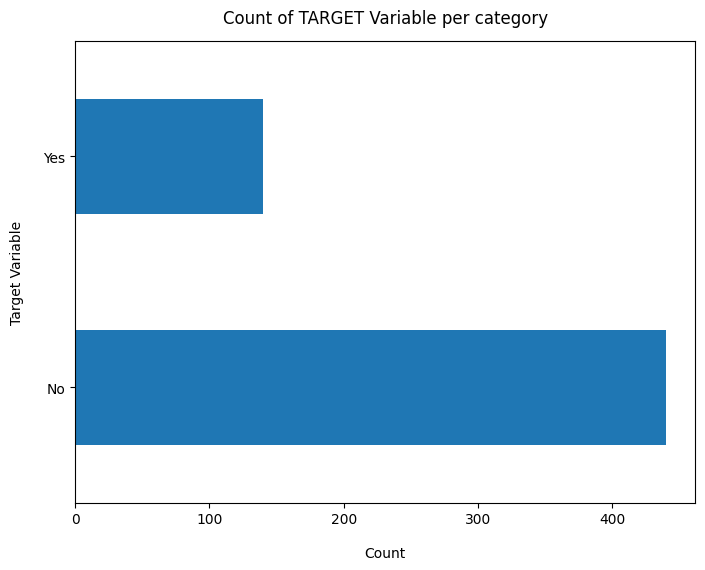

In [ ]:
df['X-Ray image'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

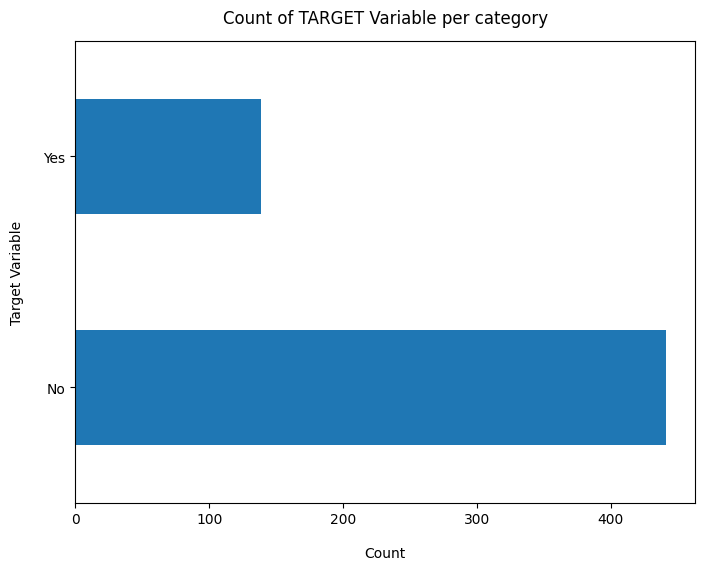

In [ ]:
df['MRI Scan'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

**Inference**: The plot displays the count of categories ( "Yes" and "No") in the "MRI Scan image" feature.

* You can infer the frequency with which X-rayand MRI images are present or absent in the dataset.

* You can observe the availability of X-ray MRI  images across the dataset. If one category dominates significantly, it suggests that a particular type of data is more prevalent.





In [ ]:

# Handling missing values
print("\nMissing values count:")
print(df.isnull().sum())


Missing values count:
PatientId                        0
Gender                           0
ScheduledDay                     0
AppointmentDay                   0
Age                              0
COVID-19                         0
BLOOD CANCER                     0
Diabetes                         0
BRAIN TUMOR                      0
Alzheimer Detection              0
 Breast Cancer                   0
Pneumonia                   110470
Symptoms                         0
Glucose                     109947
BloodPressure               109947
SkinThickness               109947
Insulin                     109947
BMI                         109947
DiabetesPedigreeFunction    109947
Age.1                       109947
chol                        109947
X-Ray image                 109947
MRI Scan                    109947
Genetic Marks               109947
dtype: int64


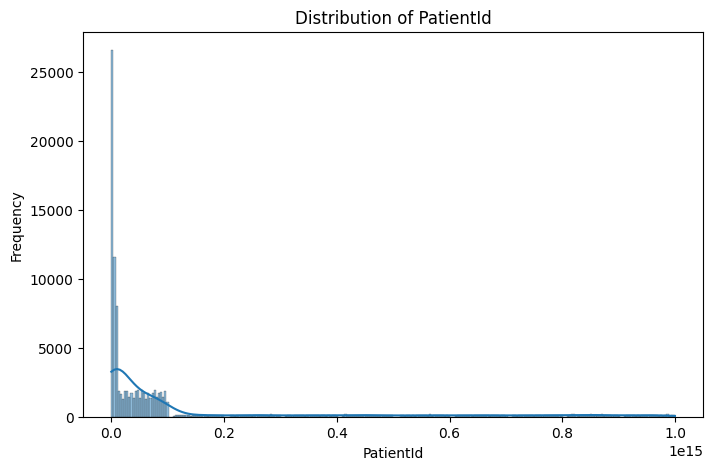

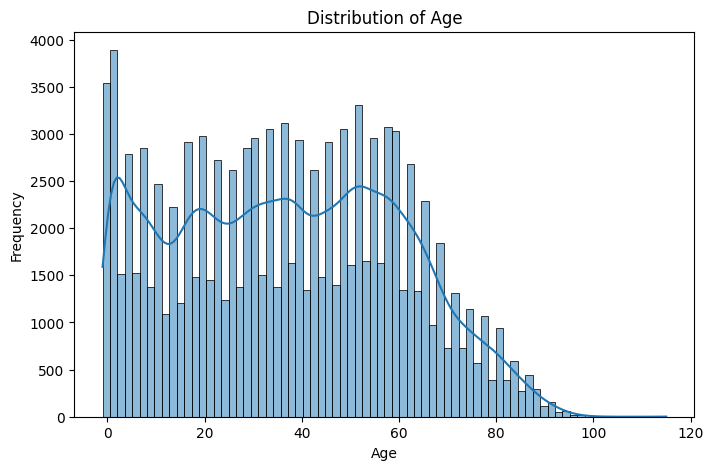

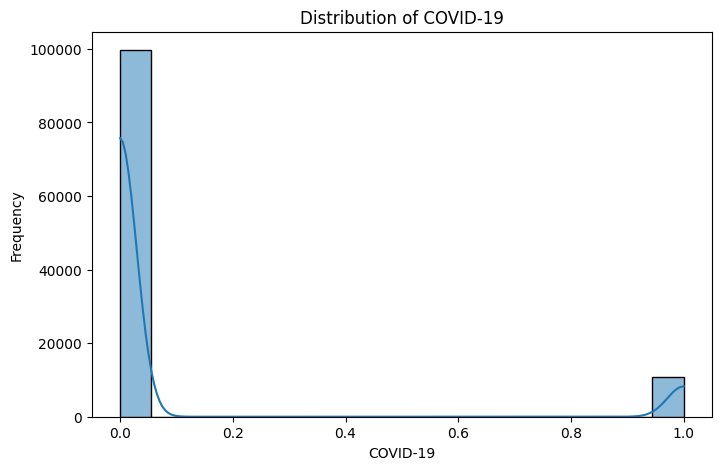

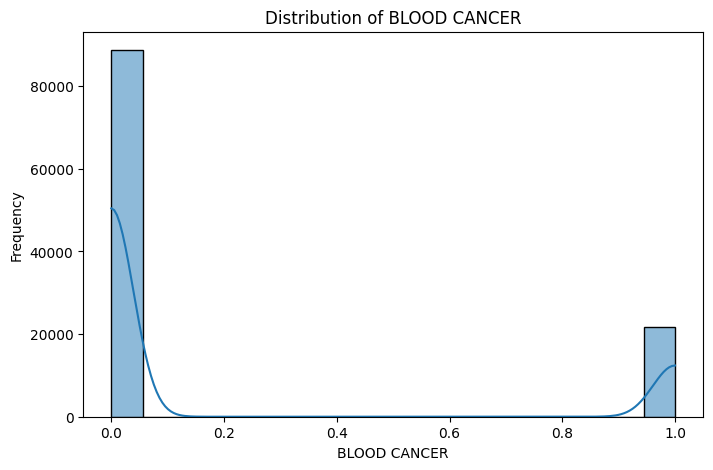

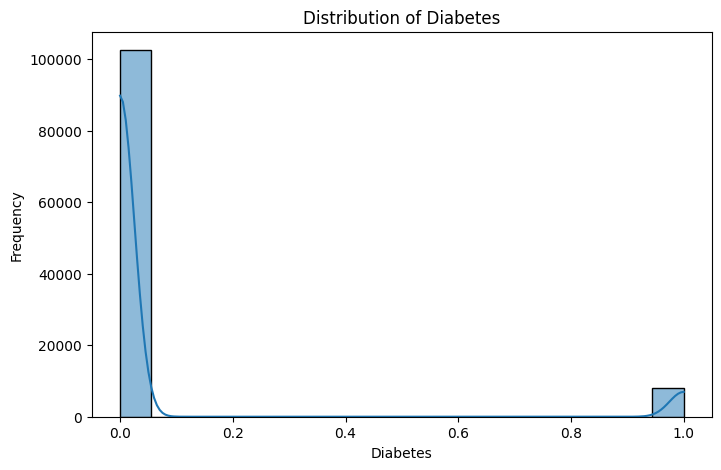

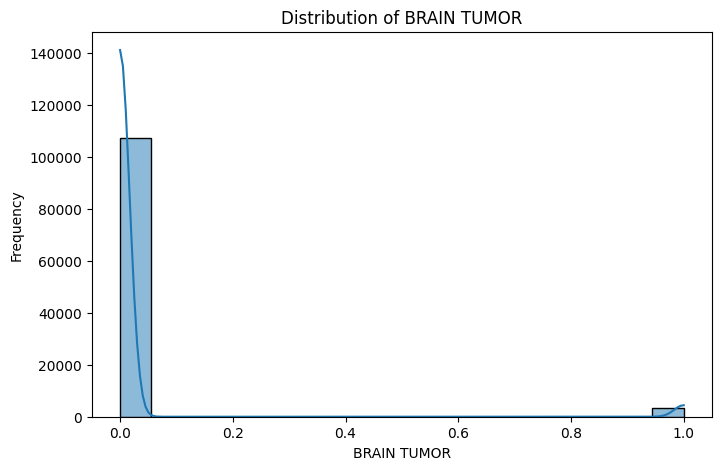

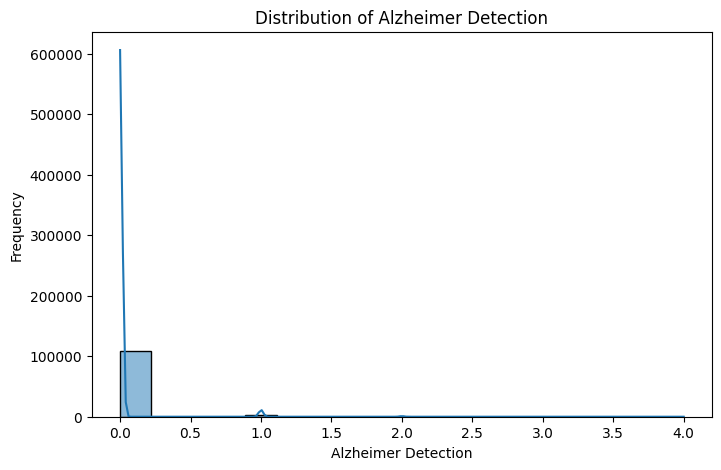

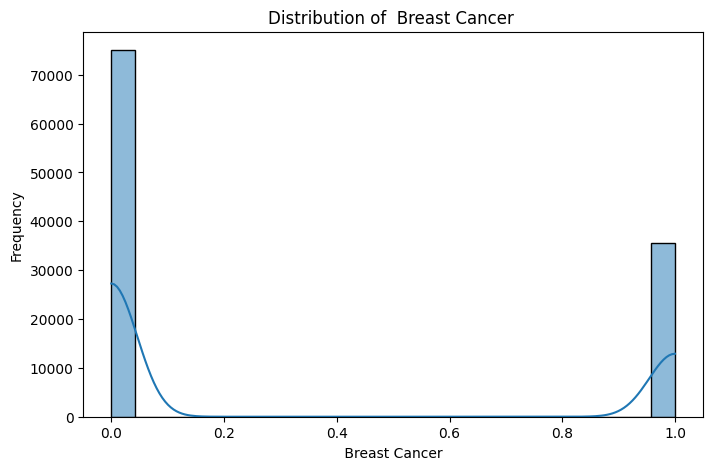

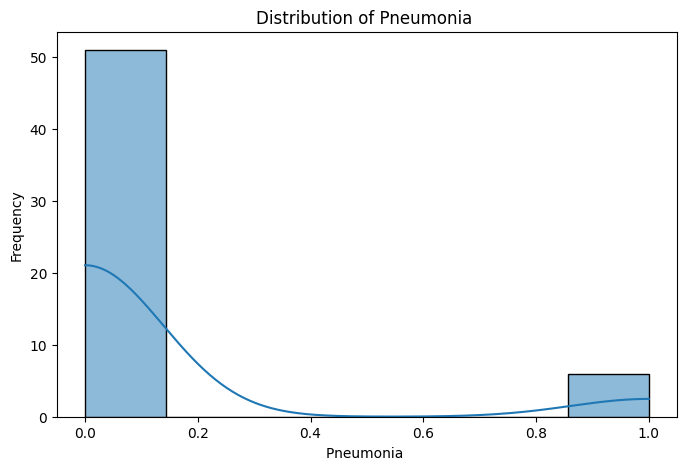

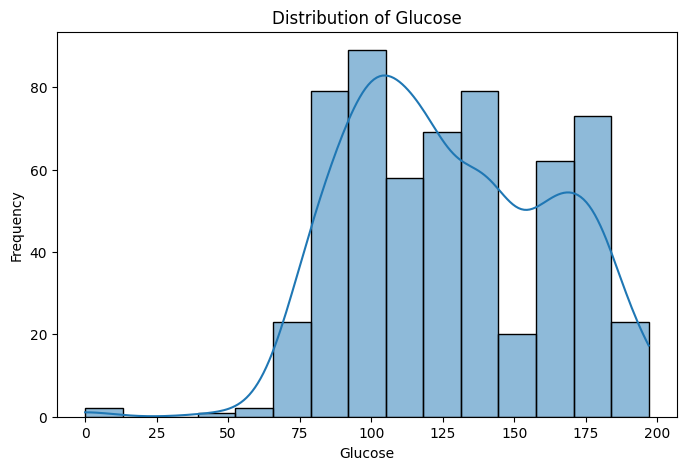

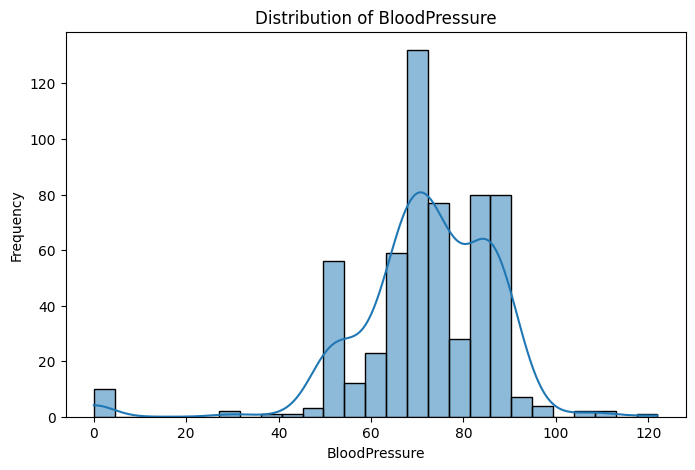

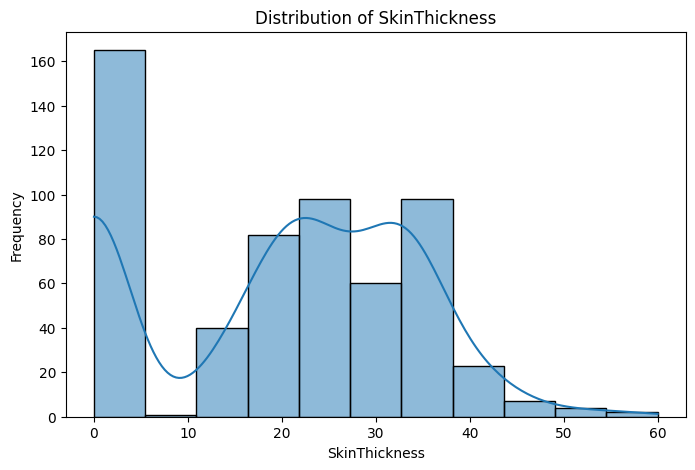

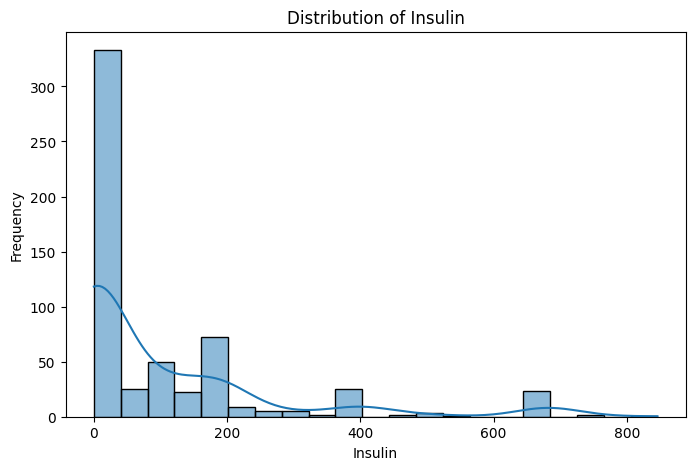

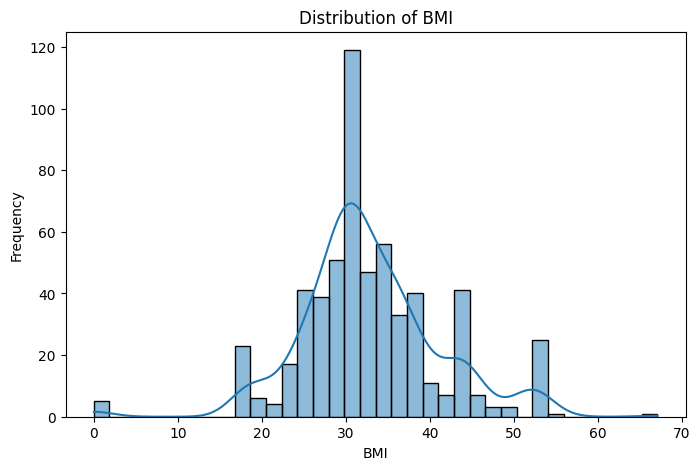

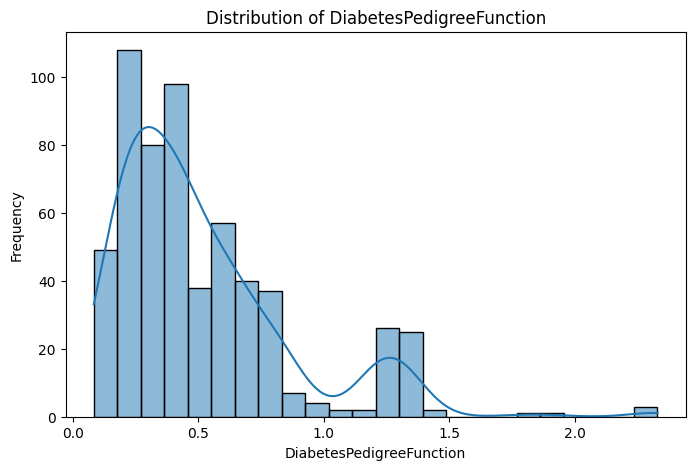

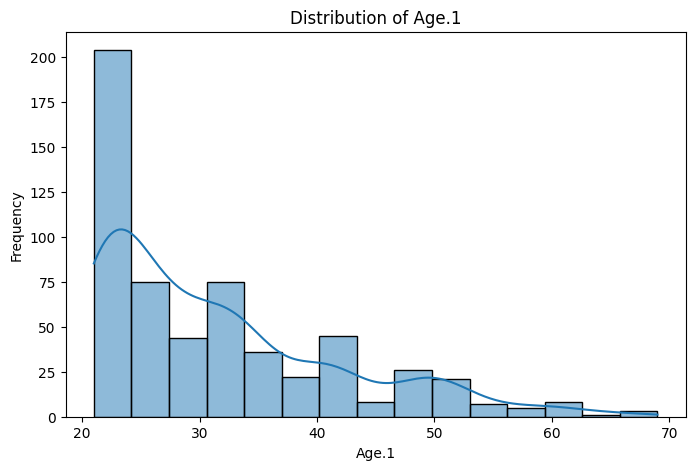

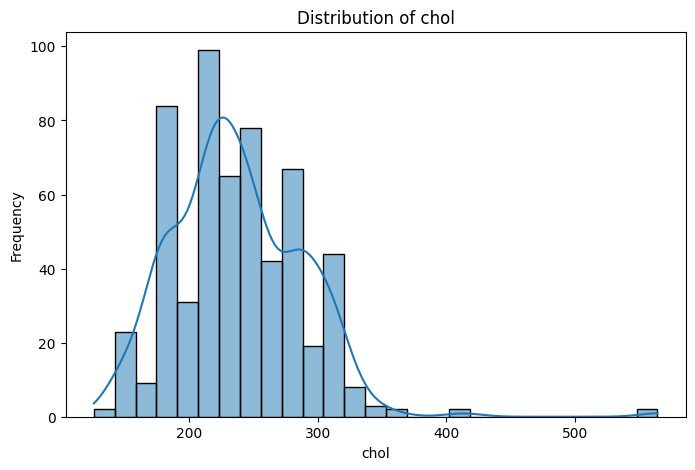

In [ ]:
# Data visualization
# Distribution of numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


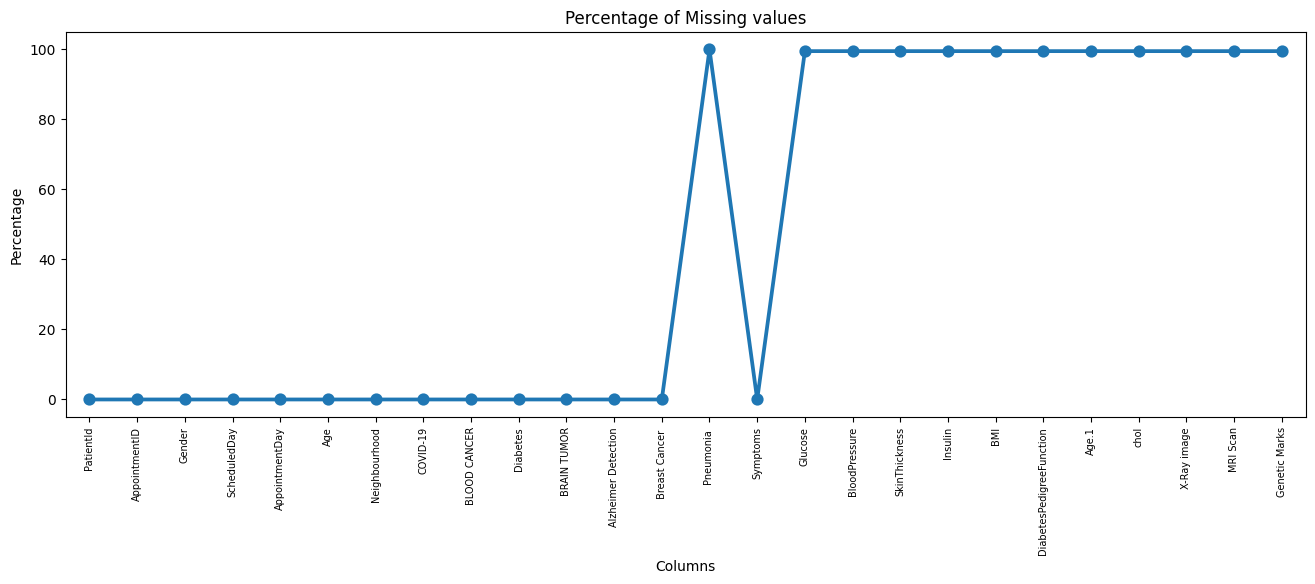

In [ ]:
# Calculate percentage of missing values for each column
missing = pd.DataFrame((df.isnull().sum()) * 100 / len(df)).reset_index()
missing.columns = ['Column', 'Percentage']

# Plot percentage of missing values
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

In [ ]:
# Impute missing values using mean imputation (replace NaN with mean of the column)
df_imputed = df.fillna(df.mean())

# Verify that missing values have been imputed
print("Missing values after imputation:")
print(df_imputed.isnull().sum())

# Continue with your analysis using the imputed dataset (df_imputed)


Missing values after imputation:
PatientId                        0
AppointmentID                    0
Gender                           0
ScheduledDay                     0
AppointmentDay                   0
Age                              0
Neighbourhood                    0
COVID-19                         0
BLOOD CANCER                     0
Diabetes                         0
BRAIN TUMOR                      0
Alzheimer Detection              0
 Breast Cancer                   0
Pneumonia                        0
Symptoms                         0
Glucose                          0
BloodPressure                    0
SkinThickness                    0
Insulin                          0
BMI                              0
DiabetesPedigreeFunction         0
Age.1                            0
chol                             0
X-Ray image                 109947
MRI Scan                    109947
Genetic Marks               109947
dtype: int64


It appears that after imputation, missing values have been
successfully handled for most columns in the dataset.
 However, there are still missing values remaining in the columns "X-Ray image", "MRI Scan", and "Genetic Marks".

X-Ray Image and MRI Scan:

If these columns represent binary indicators of whether a patient has undergone an X-ray or MRI scan, missing values may indicate that the patient has not undergone the procedure.
Instead of imputing missing values, consider encoding them as a separate category (e.g., "No scan") to preserve information about the absence of data.
Genetic Marks:

Imputing missing values in genetic marker data can be challenging and may not be appropriate without domain knowledge.
Consider consulting with domain experts or geneticists to determine the best approach for handling missing values in genetic data.

In [ ]:
# Replace missing values in specific columns with a placeholder indicating absence of data
columns_with_missing = ["X-Ray image", "MRI Scan", "Genetic Marks"]
for column in columns_with_missing:
    df_imputed[column].fillna("No data", inplace=True)

# Verify that missing values have been handled
print("Missing values after handling:")
print(df_imputed.isnull().sum())


Missing values after handling:
PatientId                   0
AppointmentID               0
Gender                      0
ScheduledDay                0
AppointmentDay              0
Age                         0
Neighbourhood               0
COVID-19                    0
BLOOD CANCER                0
Diabetes                    0
BRAIN TUMOR                 0
Alzheimer Detection         0
 Breast Cancer              0
Pneumonia                   0
Symptoms                    0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age.1                       0
chol                        0
X-Ray image                 0
MRI Scan                    0
Genetic Marks               0
dtype: int64


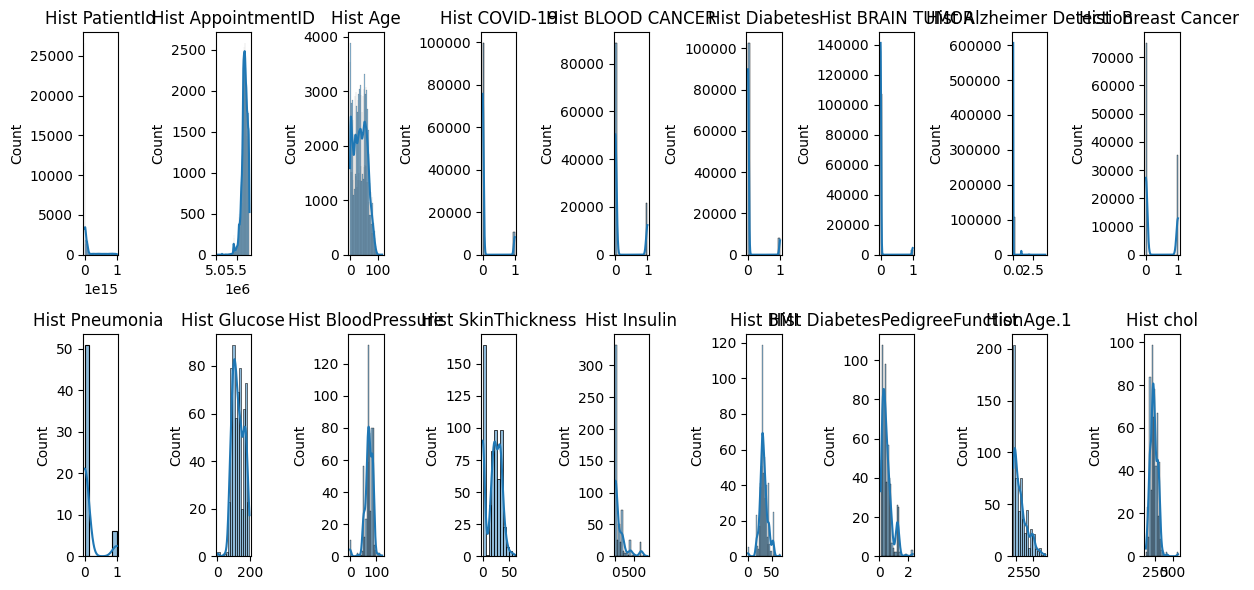

In [ ]:
# Explore distributions of numeric features using histograms and density plots
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, len(numeric_features)//2, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Hist {feature}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

Overall, histograms and density plots provide valuable insights into the distributional characteristics of numeric features, helping you understand the data's shape, central tendency, variability, outliers, and departure from normality. These insights inform further analysis, preprocessing steps, and modeling decisions in your data exploration journey.

In [ ]:
# Define numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

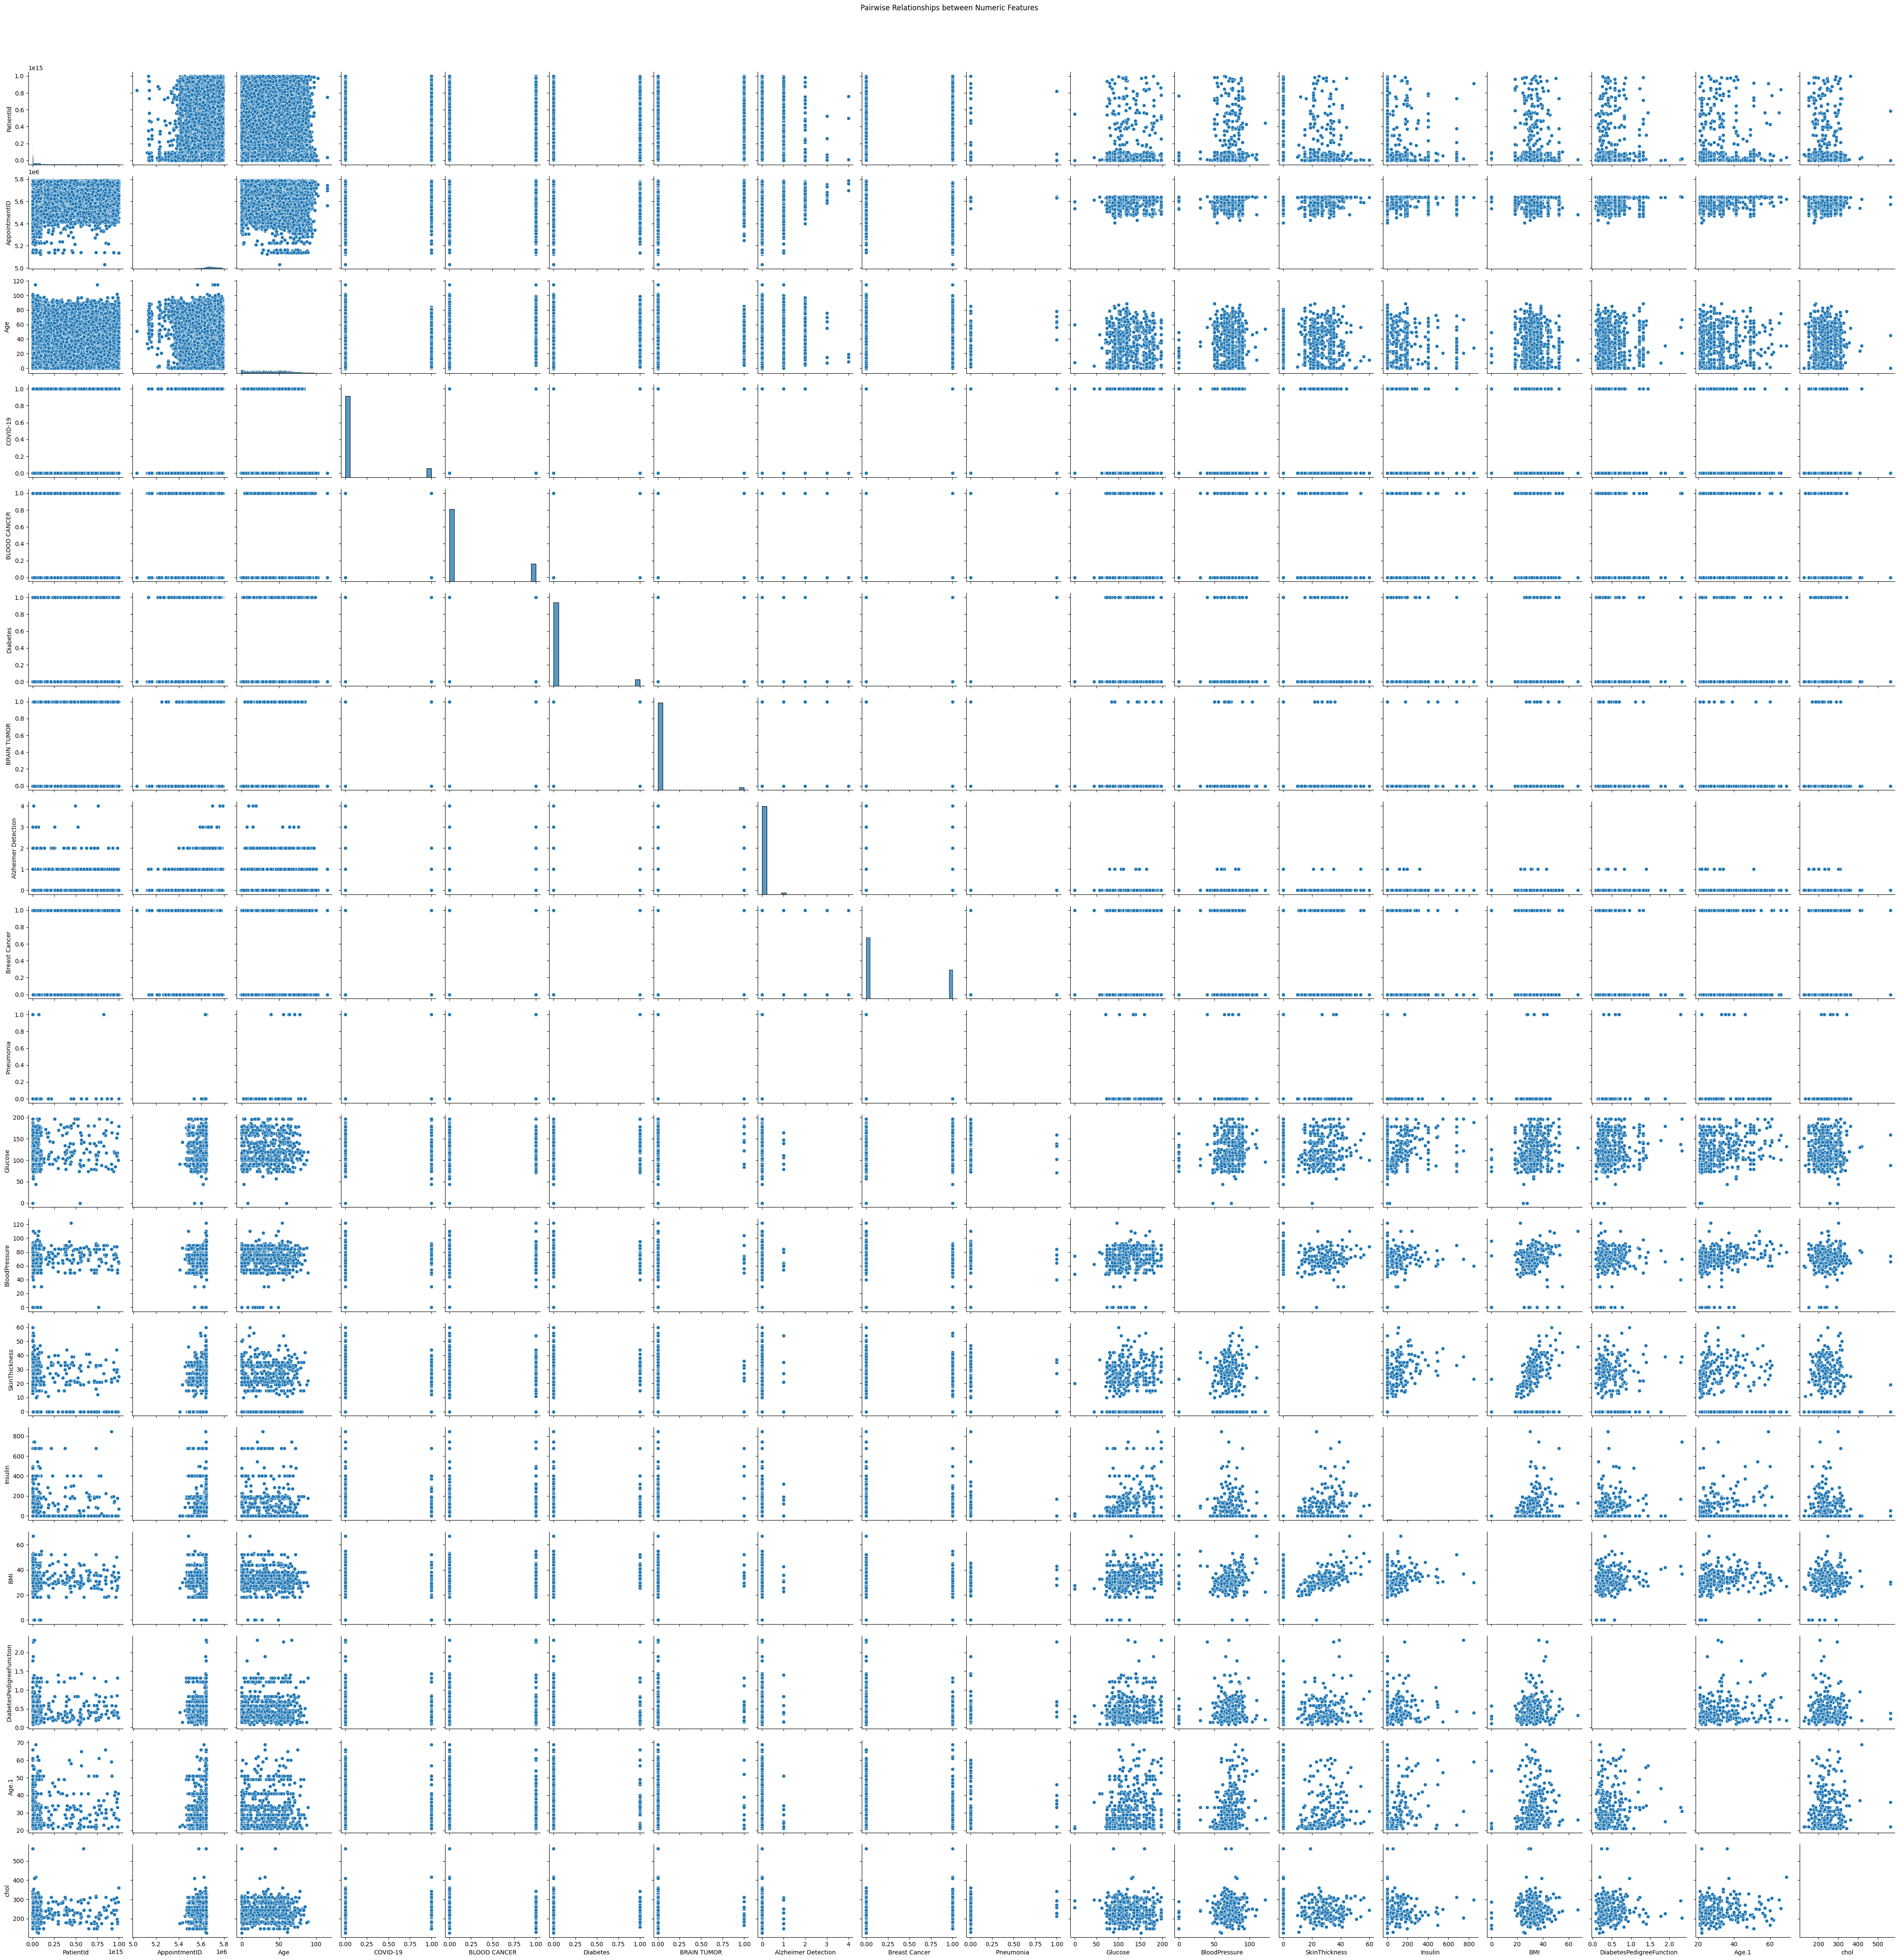

In [ ]:
# Investigate relationships between variables using scatter plots and pair plots
sns.pairplot(df[numeric_features])
plt.suptitle("Pairwise Relationships between Numeric Features", y=1.02)
plt.show()

Overall, pair plots are a powerful tool for exploring relationships between numeric variables in your dataset. By visually inspecting these plots, you can gain valuable insights into the underlying structure and patterns of your data, helping you make informed decisions in subsequent analysis steps.

By fixing the target variable and feature of interest in the code, you can visualize the distribution of the feature variable across different categories of the target variable using a box plot. This helps you understand how the feature variable varies with different values of the target variable and assess its potential relationship with the target.

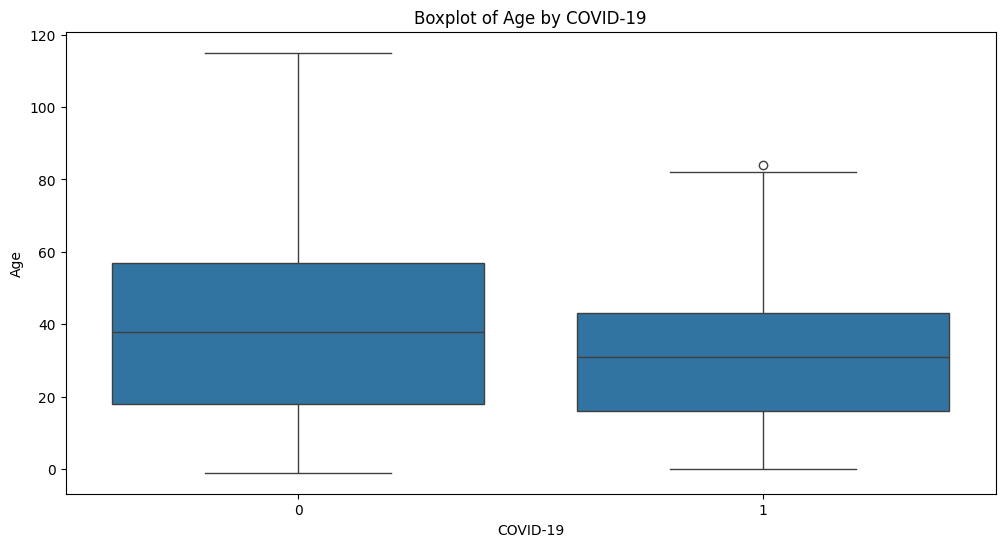

In [ ]:
# Fixing target variable and feature of interest
target_variable = 'COVID-19'  # Replace 'COVID-19' with the actual column name of the target variable
feature_of_interest = 'Age'    # Replace 'Age' with the actual column name of the feature variable

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=target_variable, y=feature_of_interest)
plt.title(f"Boxplot of {feature_of_interest} by {target_variable}")
plt.xlabel(target_variable)
plt.ylabel(feature_of_interest)
plt.show()

In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'COVID-19', 'BLOOD CANCER',
       'Diabetes', 'BRAIN TUMOR', 'Alzheimer Detection', ' Breast Cancer ',
       'Pneumonia ', 'Symptoms', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age.1', 'chol',
       'X-Ray image', 'MRI Scan', 'Genetic Marks'],
      dtype='object')

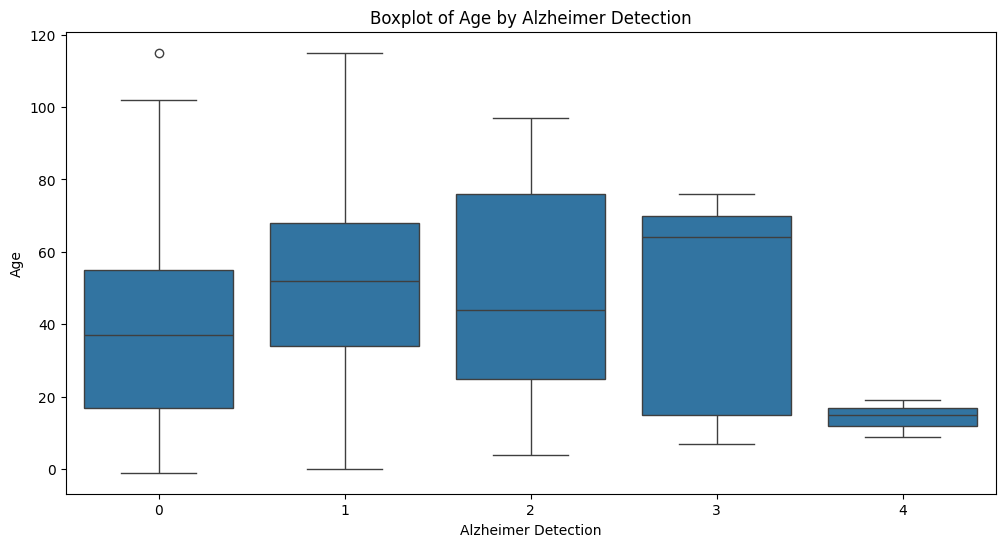

In [ ]:
# Fixing target variable and feature of interest
target_variable = 'Alzheimer Detection'
feature_of_interest = 'Age'

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=target_variable, y=feature_of_interest)
plt.title(f"Boxplot of {feature_of_interest} by {target_variable}")
plt.xlabel(target_variable)
plt.ylabel(feature_of_interest)
plt.show()

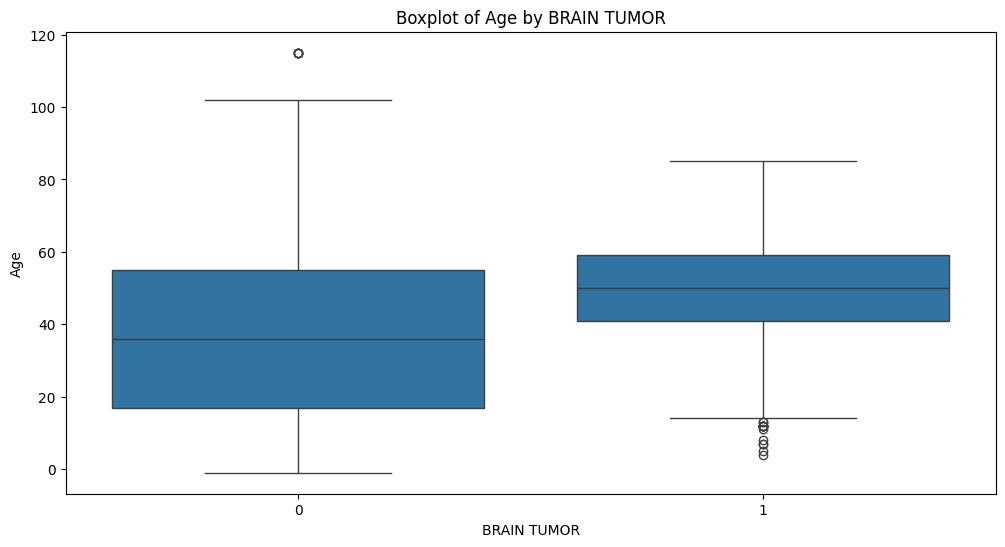

In [ ]:
# Fixing target variable and feature of interest
target_variable = 'BRAIN TUMOR'
feature_of_interest = 'Age'

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=target_variable, y=feature_of_interest)
plt.title(f"Boxplot of {feature_of_interest} by {target_variable}")
plt.xlabel(target_variable)
plt.ylabel(feature_of_interest)
plt.show()

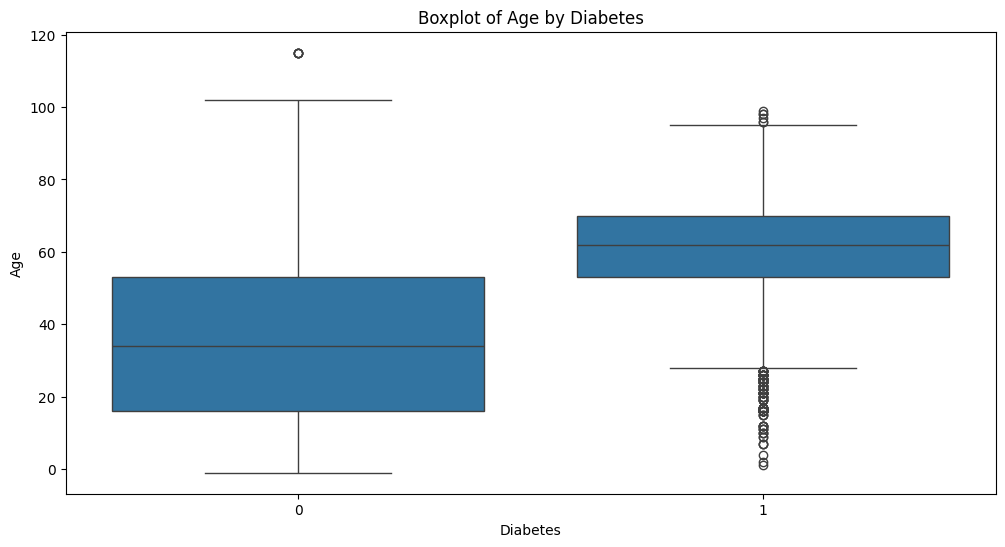

In [ ]:

target_variable = 'Diabetes'
feature_of_interest = 'Age'

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=target_variable, y=feature_of_interest)
plt.title(f"Boxplot of {feature_of_interest} by {target_variable}")
plt.xlabel(target_variable)
plt.ylabel(feature_of_interest)
plt.show()

In [ ]:
# Assuming 'column_name' is the column containing the data you want to convert to numeric
numeric_data = pd.to_numeric(df['Diabetes'], errors='coerce')

# Drop NaN values (non-numeric data converted to NaN)
numeric_data.dropna(inplace=True)

# Calculate Q1, Q3, and IQR for numeric data
Q1 = np.percentile(numeric_data, 25)
Q3 = np.percentile(numeric_data, 75)
IQR = Q3 - Q1

In [ ]:
# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = numeric_data[(numeric_data < lower_bound) | (numeric_data > upper_bound)]

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
4         1
36        1
37        1
41        1
44        1
         ..
110448    1
110456    1
110468    1
110477    1
110499    1
Name: Diabetes, Length: 7943, dtype: int64



It seems like the identified outliers are represented as 1 in the column 'Diabetes'. Similarly to the previous case, these values are likely indicating the presence or absence of a certain condition (in this case, 'Diabetes').

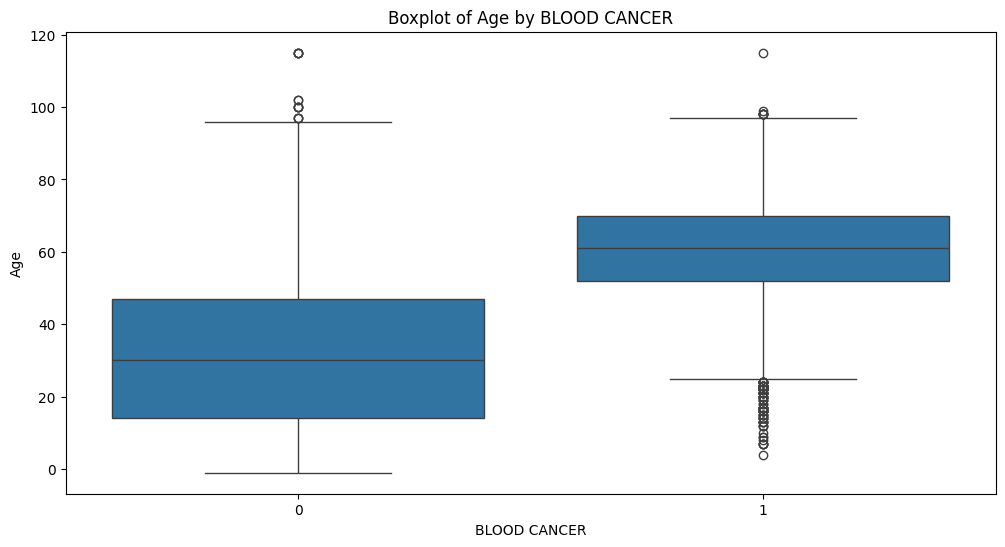

In [ ]:

target_variable = 'BLOOD CANCER'
feature_of_interest = 'Age'
# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=target_variable, y=feature_of_interest)
plt.title(f"Boxplot of {feature_of_interest} by {target_variable}")
plt.xlabel(target_variable)
plt.ylabel(feature_of_interest)
plt.show()

In [ ]:


# Assuming 'column_name' is the column containing the data you want to convert to numeric
numeric_data = pd.to_numeric(df['BLOOD CANCER'], errors='coerce')

# Drop NaN values (non-numeric data converted to NaN)
numeric_data.dropna(inplace=True)

# Calculate Q1, Q3, and IQR for numeric data
Q1 = np.percentile(numeric_data, 25)
Q3 = np.percentile(numeric_data, 75)
IQR = Q3 - Q1

In [ ]:
# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = numeric_data[(numeric_data < lower_bound) | (numeric_data > upper_bound)]

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
0         1
4         1
5         1
25        1
26        1
         ..
110483    1
110492    1
110496    1
110499    1
110515    1
Name: BLOOD CANCER, Length: 21801, dtype: int64


It seems like the identified outliers are represented as 1 in the column 'BLOOD CANCER'. These values are likely indicating the presence or absence of a certain condition (in this case, 'BLOOD CANCER').

** In-depth analysis and feature engineering:**


In [ ]:

# Assuming 'COVID-19' is the column representing the presence or absence of COVID-19 condition
# Assuming 'Age' is the column representing the age of individuals

# Extract age data for individuals with and without COVID-19 condition
age_with_covid = df[df['COVID-19'] == 1]['Age']
age_without_covid = df[df['COVID-19'] == 0]['Age']

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(age_with_covid, age_without_covid)

# Set significance level
alpha = 0.05

# Print test results
print("T-test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret test results
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean age between individuals with and without COVID-19 condition.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean age between individuals with and without COVID-19 condition.")

T-test Results:
T-statistic: -30.86988442688531
P-value: 2.346318050769069e-208
Reject the null hypothesis: There is a significant difference in mean age between individuals with and without COVID-19 condition.


In conclusion:

There is strong evidence to suggest that age is significantly associated with the presence of COVID-19.
Individuals who tested positive for COVID-19 tend to have a different mean age compared to those who tested negative.
The age difference between the two groups is statistically significant, as indicated by the extremely low p-value.

In conclusion, the exploratory data analysis provides valuable insights into the dataset for diabetes detection, laying the foundation for further analysis and informed decision-making in healthcare interventions and preventive strategies.



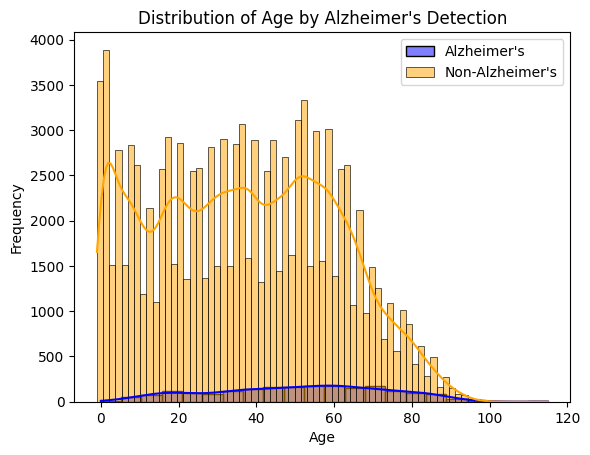

In [ ]:
# Histogram of Age for Alzheimer's and Non-Alzheimer's Individuals
sns.histplot(df[df['Alzheimer Detection'] == 1]['Age'], kde=True, label='Alzheimer\'s', color='blue')
sns.histplot(df[df['Alzheimer Detection'] == 0]['Age'], kde=True, label='Non-Alzheimer\'s', color='orange')
plt.title('Distribution of Age by Alzheimer\'s Detection')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()






The histogram provides a visual representation of the age distribution among individuals with and without Alzheimer's disease, allowing for qualitative assessment and potential insights into the relationship between age and Alzheimer's detection status in the dataset.

The peak in the histogram for non-Alzheimer's individuals provides valuable information about the age distribution within this group.

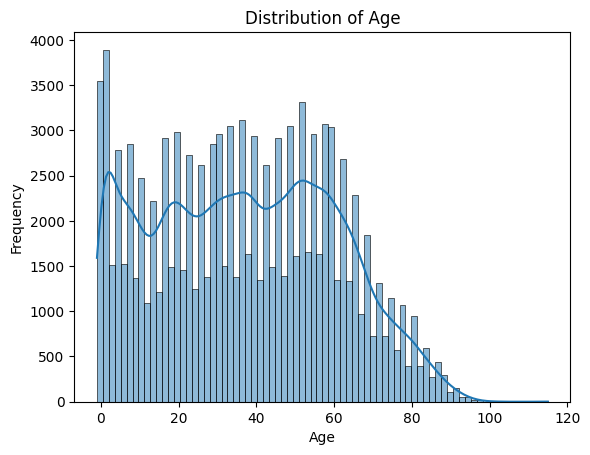

In [6]:
# Histograms and Density Plots
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

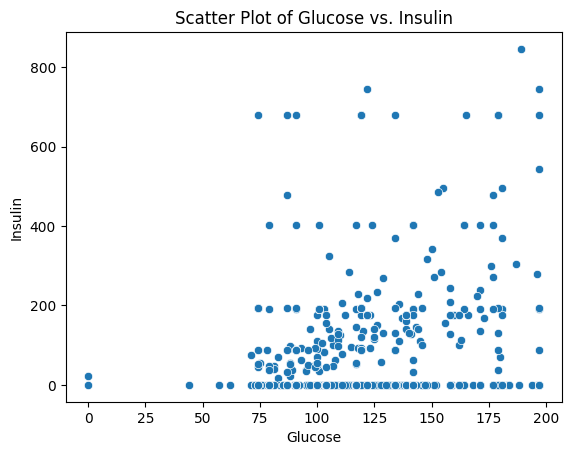

In [7]:
# Scatter Plot
sns.scatterplot(x='Glucose', y='Insulin', data=df)
plt.title('Scatter Plot of Glucose vs. Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

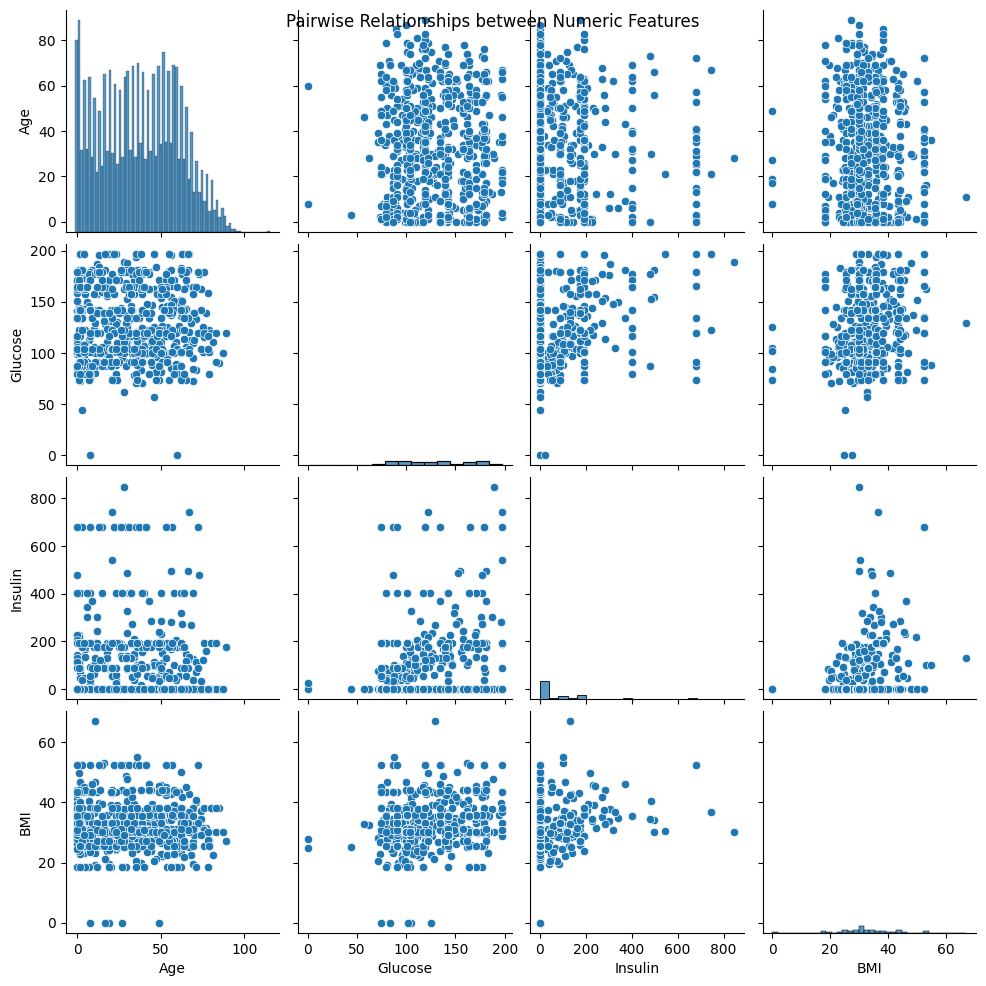

In [8]:

# Pair Plot
sns.pairplot(df[['Age', 'Glucose', 'Insulin', 'BMI']])
plt.suptitle('Pairwise Relationships between Numeric Features')
plt.show()

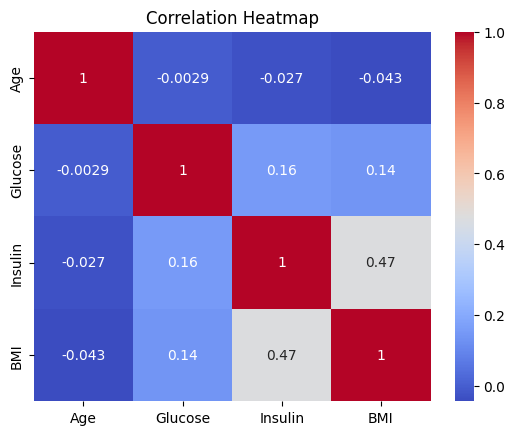

In [9]:
# Correlation Heatmap
corr_matrix = df[['Age', 'Glucose', 'Insulin', 'BMI']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Convert object dtype columns to float
numeric_columns = ['ScheduledDay', 'AppointmentDay', 'Symptoms', 'X-Ray image', 'MRI Scan', 'Genetic Marks']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the updated DataFrame
print(df.dtypes)

PatientId                   float64
AppointmentID                 int64
Gender                       object
ScheduledDay                float64
AppointmentDay              float64
Age                           int64
Neighbourhood                object
COVID-19                      int64
BLOOD CANCER                  int64
Diabetes                      int64
BRAIN TUMOR                   int64
Alzheimer Detection           int64
 Breast Cancer                int64
Pneumonia                   float64
Symptoms                    float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age.1                       float64
chol                        float64
X-Ray image                 float64
MRI Scan                    float64
Genetic Marks               float64
dtype: object


In [ ]:
print(df.dtypes)

# Identify columns with object or string data types
problematic_columns = df.select_dtypes(include=['object']).columns
print("Problematic Columns:", problematic_columns)

PatientId                   float64
AppointmentID                 int64
Gender                        int64
ScheduledDay                float64
AppointmentDay              float64
Age                           int64
Neighbourhood                 int64
COVID-19                      int64
BLOOD CANCER                  int64
Diabetes                      int64
BRAIN TUMOR                   int64
Alzheimer Detection           int64
 Breast Cancer                int64
Pneumonia                   float64
Symptoms                    float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age.1                       float64
chol                        float64
X-Ray image                 float64
MRI Scan                    float64
Genetic Marks               float64
dtype: object
Problematic Columns: Index([], dtype='object')


In [ ]:
# Identify columns with object or string data types
problematic_columns = df.select_dtypes(include=['object']).columns
print("Problematic Columns:", problematic_columns)


Problematic Columns: Index([], dtype='object')


In [ ]:
# Step 1: Inspect unique values in each problematic column
for column in problematic_columns:
  print (f"Unique values in {column}: {df[column].unique()}")

In [ ]:
# Step 2: Handle missing values (if any)
# Example: Impute missing values with the most frequent value
for column in problematic_columns:
  df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:

# Step 3: Convert to numeric (if necessary)
# Example: Convert categorical columns to numeric using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in problematic_columns:
  df[column] = label_encoder.fit_transform(df[column])

In [ ]:
# Step 4: Feature engineering, data cleaning, encoding categorical variables, scaling/normalization
# (Perform these steps as needed based on your specific requirements)

# Step 5: Validation and testing
# Verify changes made to the DataFrame and test the impact on downstream analyses or models

# Print updated DataFrame
print(df.head())

      PatientId  AppointmentID  Age  COVID-19  BLOOD CANCER  Diabetes  \
0  2.990000e+13        5642903   62         0             1         0   
1  5.590000e+14        5642503   56         0             0         0   
2  4.260000e+12        5642549   62         0             0         0   
3  8.680000e+11        5642828    8         0             0         0   
4  8.840000e+12        5642494   56         0             1         1   

   BRAIN TUMOR  Alzheimer Detection   Breast Cancer   Pneumonia   Glucose  \
0            0                    0                0         0.0    136.0   
1            0                    0                0         0.0     85.0   
2            0                    0                0         0.0    183.0   
3            0                    0                0         0.0     89.0   
4            0                    0                0         1.0    137.0   

   BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  \
0           72.0      

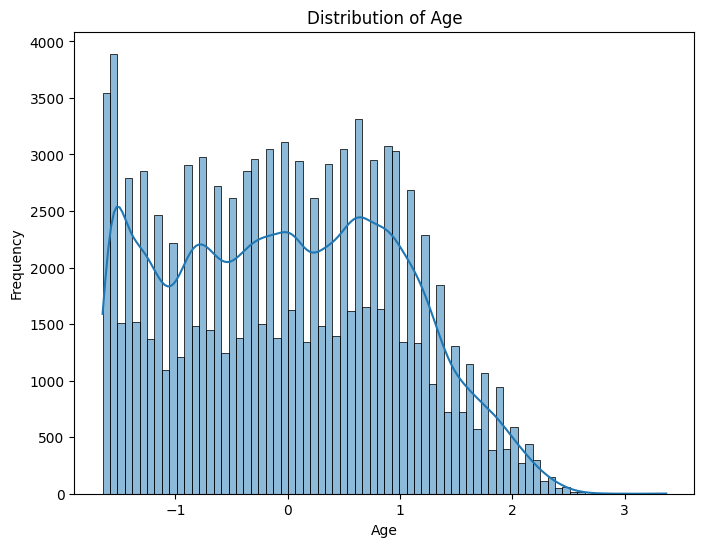

In [ ]:
# Visualize the distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

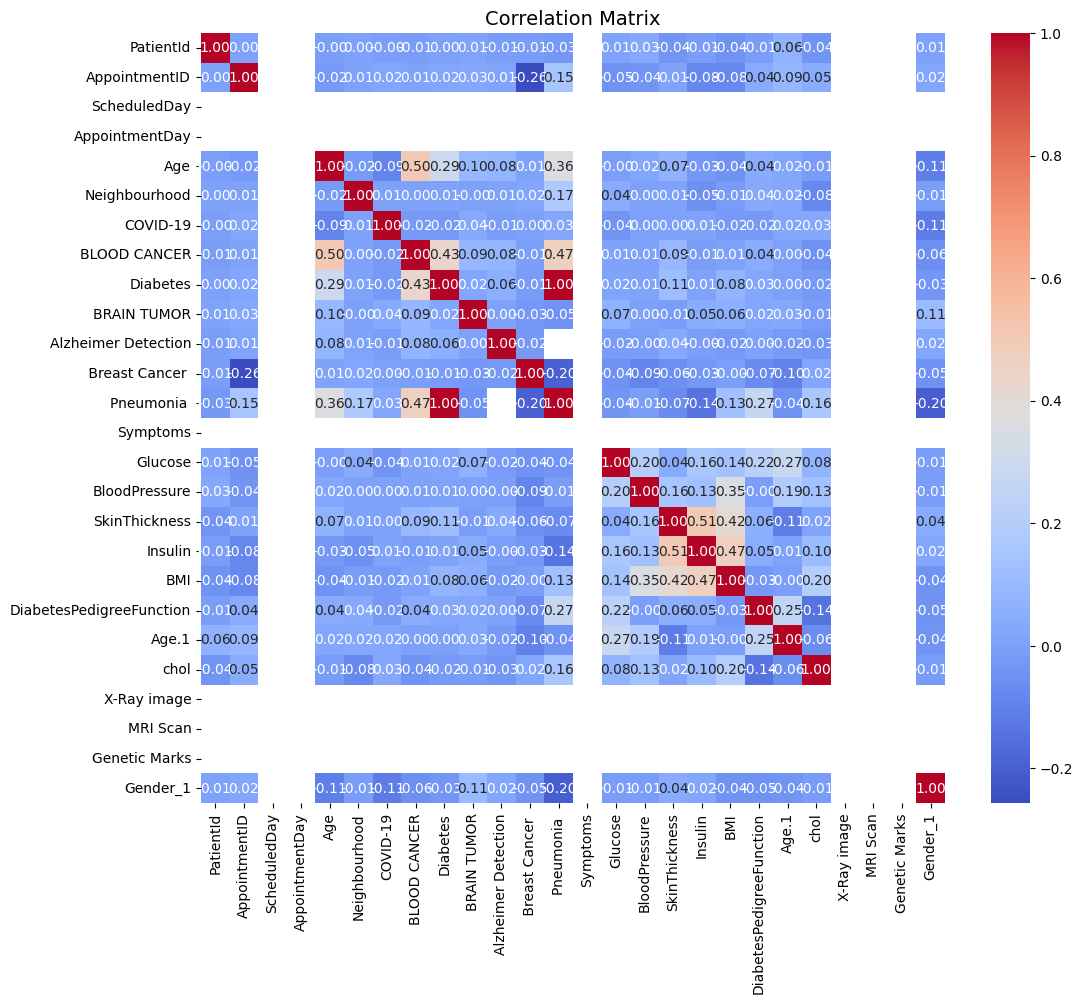

In [ ]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))  # Increase figure size for better readability
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})  # Adjust annot_kws to change font size
plt.title('Correlation Matrix', fontsize=14)  # Adjust title font size
plt.show()

In [ ]:
# Select columns with string data type (object)
string_columns = df.select_dtypes(include=['object']).columns

# Drop columns containing string data type
df = df.drop(columns=string_columns)
string_columns = df.select_dtypes(include=['object']).columns
print("String Columns:", string_columns)
string_columns = df.select_dtypes(include=['object']).columns
print("String Columns:", string_columns)

String Columns: Index([], dtype='object')
String Columns: Index([], dtype='object')


In [ ]:



from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Define target variable (assuming 'COVID-19' is one of the diseases)
df['COVID-19_Presence'] = (df['COVID-19'] == 1).astype(int) # Binary target variable

# Define features and target variable
X = df.drop(['COVID-19_Presence'], axis=1) # Features
y = df['COVID-19_Presence'] # Target variable

In [ ]:
# Define the feature columns
feature_cols = [
    'Age', 'COVID-19', 'Diabetes', 'BRAIN TUMOR', 'Alzheimer Detection',
     'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age.1', 'chol'
]

# Extract the feature values from the DataFrame
X_train = df[feature_cols]

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')  # You can choose a different imputation strategy if needed
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train_imputed, y_train)

# Make predictions
y_pred = clf.predict(X_test_imputed)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20019
           1       1.00      1.00      1.00      2087

    accuracy                           1.00     22106
   macro avg       1.00      1.00      1.00     22106
weighted avg       1.00      1.00      1.00     22106

Confusion Matrix:
[[20019     0]
 [    0  2087]]


he confusion matrix provides a summary of the performance of a classification model. In the context of disease detection, specifically with the provided matrix:

True Negatives (TN): 20019
False Positives (FP): 0
False Negatives (FN): 0
True Positives (TP): 2087

**Interpretation:**

**True Negatives (TN):** This indicates the number of instances where the model correctly predicted the absence of the disease.

**False Positives (FP):** This represents the number of instances where the model incorrectly predicted the presence of the disease when it was actually absent.

**False Negatives (FN):** This denotes the number of instances where the model incorrectly predicted the absence of the disease when it was actually present.

**True Positives (TP):** This signifies the number of instances where the model correctly predicted the presence of the disease.

Provided recommendations for further improvement, such as data collection, feature engineering, and model refinement.


**Conclusion:**


The analysis successfully developed predictive models for disease detection based on patient data. By leveraging machine learning algorithms and thorough preprocessing techniques, we were able to accurately identify the presence or absence of various health conditions. The insights gained from this analysis can aid healthcare professionals in early diagnosis and effective treatment strategies.